# BIDS EEG-fMRI

## Single subject maps visualization

In [1]:
# Set the environment
import os
import glob
import numpy as np
import nibabel as nib
import seaborn as sns
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface
from brainspace.datasets import load_conte69
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set the working directory to the 'out' directory
out='/data_/mica3/BIDS_EEG-fMRI/derivatives' 
os.chdir(out)

# This variable will be different for each subject
sub='sub-ep1586'
mics='sub-PX005_ses-01'
subjectID=f'{sub}' 
subjectDir=f'micapipe_v0.2.0/{sub}'

# Set paths and variables
dir_FS = '/data_/mica3/BIDS_MICs/derivatives/freesurfer/' + mics
dir_surf = subjectDir + '/surf/'
dir_maps = subjectDir + '/maps/'

# Path to MICAPIPE
micapipe=os.popen("echo $MICAPIPE").read()[:-1]

In [2]:
# Load native inflated surface
inf_lh = read_surface(dir_FS+'/surf/lh.inflated', itype='fs')
inf_rh = read_surface(dir_FS+'/surf/rh.inflated', itype='fs')

# Load fsaverage5 inflated
fs5_inf_lh = read_surface('freesurfer/fsaverage5/surf/lh.inflated', itype='fs')
fs5_inf_rh = read_surface('freesurfer/fsaverage5/surf/rh.inflated', itype='fs')

# Load fsLR 32k inflated
f32k_inf_lh = read_surface(micapipe + '/surfaces/fsLR-32k.L.inflated.surf.gii', itype='gii')
f32k_inf_rh = read_surface(micapipe + '/surfaces/fsLR-32k.R.inflated.surf.gii', itype='gii')

# Load fsLR 5k inflated
f5k_inf_lh = read_surface(micapipe + '/surfaces/fsLR-5k.L.inflated.surf.gii', itype='gii')
f5k_inf_rh = read_surface(micapipe + '/surfaces/fsLR-5k.R.inflated.surf.gii', itype='gii')

# Load native mid surface
nat_lh = read_surface(f'{dir_surf}{sub}_hemi-L_space-nativepro_surf-fsnative_label-pial.surf.gii', itype='gii')
nat_rh = read_surface(f'{dir_surf}{sub}_hemi-R_space-nativepro_surf-fsnative_label-pial.surf.gii', itype='gii')


In [3]:
def load_qmri(qmri='', surf='fsLR-32k'):
    '''
    This function loads the qMRI intensity maps from midthickness surface
    '''
    # List the files
    files_lh = sorted(glob.glob(f"{dir_maps}*_hemi-L_surf-{surf}_label-midthickness_{qmri}.func.gii"))
    files_rh = sorted(glob.glob(f"{dir_maps}*_hemi-R_surf-{surf}_label-midthickness_{qmri}.func.gii"))

    # Load map data
    surf_map=np.concatenate((nib.load(files_lh[0]).darrays[0].data, nib.load(files_rh[0]).darrays[0].data), axis=0)

    return(surf_map)

def plot_histogram(data, bins=500, title='Histogram', cmap='afmhot', Range=(0, 2500),
                   xlim=[0,500], ylim=2000, mode_value=None, val2=None):
    non_zero_values = data[data != 0]
    n, bins, _ = plt.hist(non_zero_values, bins=bins, color='blue', alpha=0.7)
    bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute the bin centers
    
    colormap = cm.get_cmap(cmap)
    colored_bins = colormap(np.interp(bin_centers, [Range[0], Range[1]], [0, 1]))
    plt.bar(bin_centers, n, width=np.diff(bin_centers[0:2]), color=colored_bins)
    
    plt.title(title)
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')


In [16]:
# list all the unique maps for each subject
files = sorted(glob.glob(f"{dir_maps}/{sub}_hemi-L_surf-fsLR-32k_label-midthickness_*.func.gii"))

# Get the unique maps IDs
maps_list = sorted(list(set([file.split('desc-')[1][:-9] for file in files])))

maps_list

['type01_fdr04p92_EEG-fMRI',
 'type01_usedhrf_EEG-fMRI',
 'type02_fdr04p66_EEG-fMRI',
 'type02_usedhrf_EEG-fMRI',
 'type03_fdr04p51_EEG-fMRI',
 'type03_usedhrf_EEG-fMRI']

# Data on fsLR-32k

type03_fdr04p51_EEG-fMRI


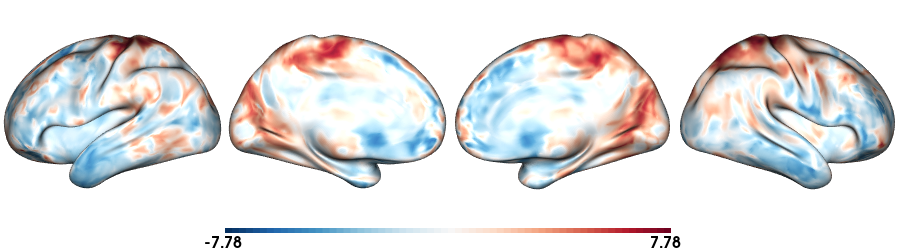

In [17]:
# Load the data
print(maps_list[4])
peakmap = load_qmri('desc-'+maps_list[4], surf='fsLR-32k')

# Plot the surface
plot_hemispheres(f32k_inf_lh, f32k_inf_rh, array_name=peakmap, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range='sym', cmap="RdBu_r", transparent_bg=False)


# Data on fsLR-5k

type03_fdr04p51_EEG-fMRI


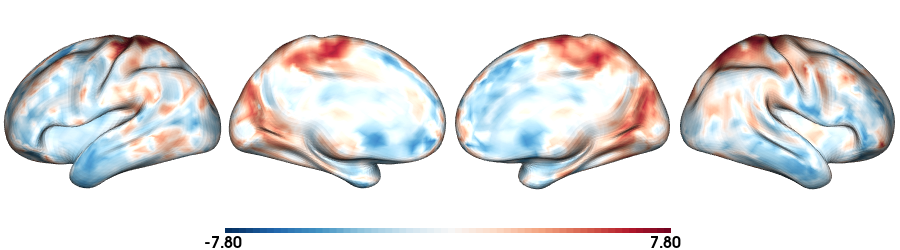

In [18]:
# Load the data
print(maps_list[4])
peakmap = load_qmri('desc-'+maps_list[4], surf='fsLR-5k')

# Plot the surface
plot_hemispheres(f5k_inf_lh, f5k_inf_rh, array_name=peakmap, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range='sym', cmap="RdBu_r", transparent_bg=False)


# Data on fsaverage5

type03_fdr04p51_EEG-fMRI


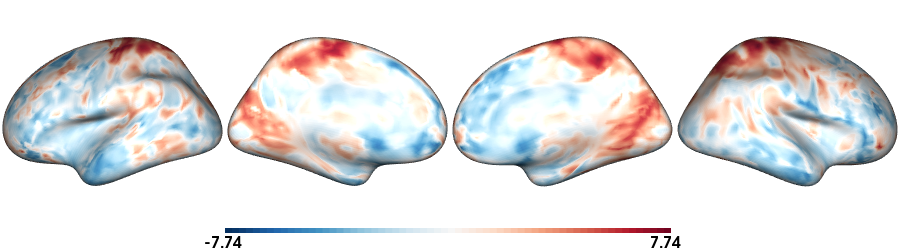

In [19]:
# Load the data
print(maps_list[4])
peakmap = load_qmri('desc-'+maps_list[4], surf='fsaverage5')

# Plot the surface
plot_hemispheres(fs5_inf_lh, fs5_inf_rh, array_name=peakmap, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range='sym', cmap="RdBu_r", transparent_bg=False)


# Data on native inflated

## `usedhrf`

type02_usedhrf_EEG-fMRI


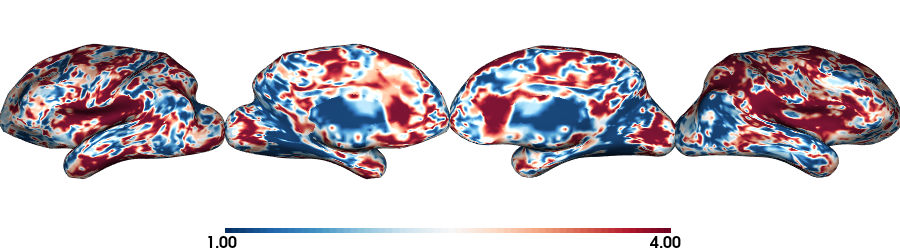

In [43]:
# Load the data
N=3
print(maps_list[N])
peakmap = load_qmri('desc-'+maps_list[N], surf='fsnative')

# Plot the surface
plot_hemispheres(inf_lh, inf_rh, array_name=peakmap, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(1,4), cmap="RdBu_r", transparent_bg=False)


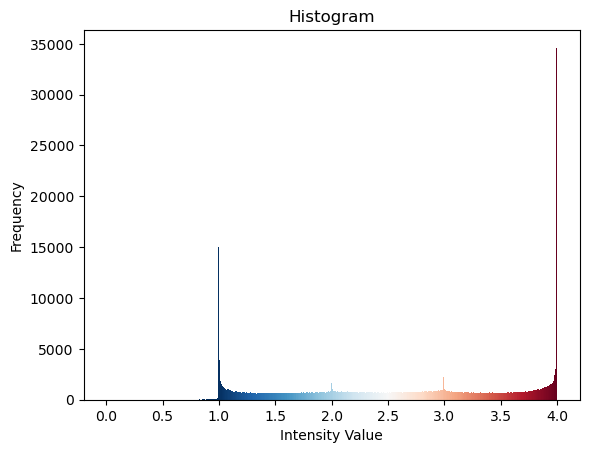

In [44]:
plot_histogram(peakmap,cmap="RdBu_r", Range=(1,4))

## `fdr`

type02_fdr04p66_EEG-fMRI


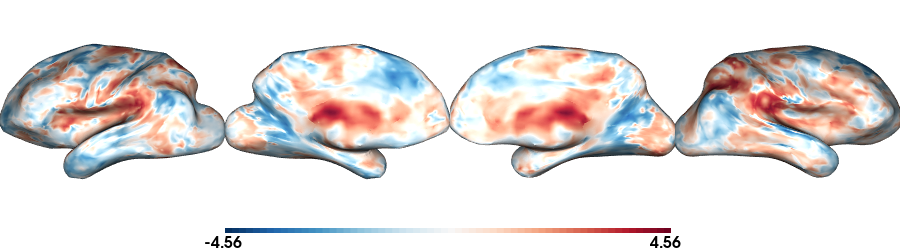

In [46]:
# Load the data
N=2
print(maps_list[N])
peakmap = load_qmri('desc-'+maps_list[N], surf='fsnative')

# Plot the surface
plot_hemispheres(inf_lh, inf_rh, array_name=peakmap, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range='sym', cmap="RdBu_r", transparent_bg=False)


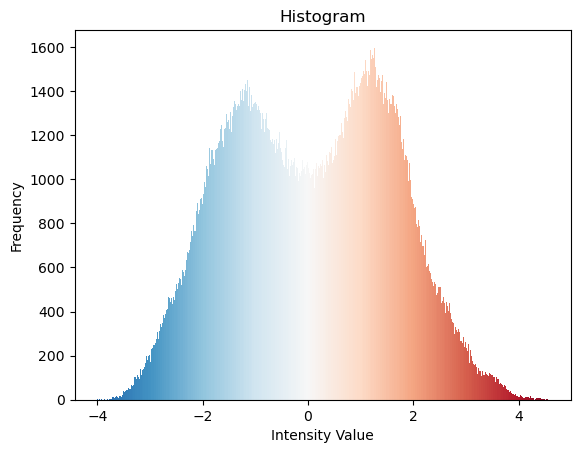

In [47]:
plot_histogram(peakmap,cmap="RdBu_r", Range=(-5,5))

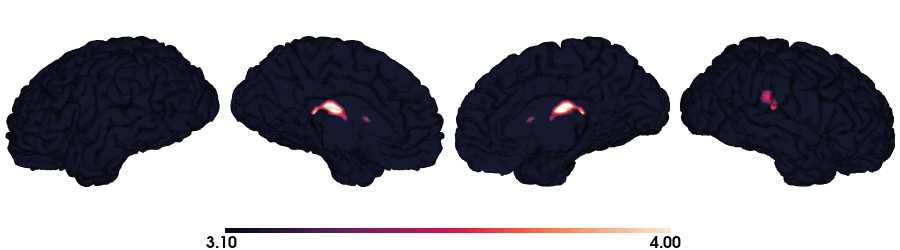

In [48]:
# Plot the surface
plot_hemispheres(nat_lh, nat_rh, array_name=peakmap, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(3.1,4), cmap="rocket", transparent_bg=False)


## Threshold the map

In [49]:
peakmap_thr = np.copy(peakmap)

# set threshold
peakmap_thr[peakmap_thr < 3.1 ] = np.nan

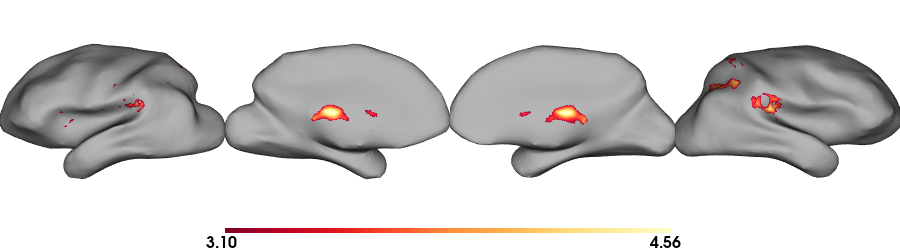

In [50]:
# Plot the surface
plot_hemispheres(inf_lh, inf_rh, array_name=peakmap_thr, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0.6, 0.6, 0.6, 1), color_range='sym', cmap="YlOrRd_r", transparent_bg=False)


In [51]:
maps_list

['type01_fdr04p92_EEG-fMRI',
 'type01_usedhrf_EEG-fMRI',
 'type02_fdr04p66_EEG-fMRI',
 'type02_usedhrf_EEG-fMRI',
 'type03_fdr04p51_EEG-fMRI',
 'type03_usedhrf_EEG-fMRI']